# Surival Analysis of Poltical Regimes

In [1]:
import pandas as pd
import matplotlib

In [2]:
from pandasql import sqldf

In [3]:
df = pd.read_csv('lifelines/datasets/dd.csv', index_col=[0])

In [4]:
df.head()

,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
ctryname,,,,,,,,,,,
Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


The `observered` variable is defined as when a regime is taken out of power and new regime takes over. If a `ehead` dies while in power and the regime maintains power then a regime change is not observed.

In [33]:
min(df['start_year'])

1946

In [34]:
max(df['start_year'])

2008

Dataset starts at 1946. Last regime `start_year` recorded is 2008.

In [5]:
q_obs = """
SELECT
  COUNT(*) as freq,
  observed
FROM df
GROUP BY
    observed
ORDER BY
    freq DESC
"""

In [6]:
print (sqldf(q_obs, locals()))

   freq  observed
0  1468         1
1   340         0


Most regimes have been removed out of power throughout history. In surival analysis when something is not observed, it is defined as a "censor".

In [37]:
print(max(df['duration']))
print(min(df['duration']))

47
1


In [35]:
df[df['duration'] == 47]

,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
ctryname,,,,,,,,,,,
Cuba,40,40.0,Caribbean,Americas,Fidel Castro Ruz,Fidel Castro Ruz.Cuba.1959.2005.Civilian Dict,Non-democracy,Civilian Dict,1959,47,1
Jordan,663,663.0,Western Asia,Asia,Hussein bin Talal,Hussein bin Talal.Jordan.1952.1998.Monarchy,Non-democracy,Monarchy,1952,47,0


Longest lasting regimes recorded were 47 years. Fidel Castro of Cuba and Hussein bin Talal of Jordan each ruled for 47 years.

In [41]:
len(df[df['duration'] == 1])

555

There were 555 regimes that lasted a year or less.

In [27]:
q_max_con = """
SELECT
  MAX(duration) as max_dur,
  un_continent_name
FROM df
GROUP BY
    un_continent_name
"""

In [28]:
print (sqldf(q_max_con, locals()))

   max_dur un_continent_name
0       42            Africa
1       47          Americas
2       47              Asia
3       39            Europe
4       44           Oceania


In [29]:
q_max_reg = """
SELECT
  MAX(duration) as max_dur,
  regime
FROM df
GROUP BY
    regime
"""

In [30]:
print (sqldf(q_max_reg, locals()))

   max_dur             regime
0       47      Civilian Dict
1       46      Military Dict
2       13          Mixed Dem
3       47           Monarchy
4       23  Parliamentary Dem
5       12   Presidential Dem


In [31]:
q_avg_reg = """
SELECT
  AVG(duration) as max_dur,
  regime
FROM df
GROUP BY
    regime
"""

In [32]:
print (sqldf(q_avg_reg, locals()))

     max_dur             regime
0   8.039394      Civilian Dict
1   7.177966      Military Dict
2   2.505455          Mixed Dem
3  14.127273           Monarchy
4   3.745299  Parliamentary Dem
5   3.409786   Presidential Dem


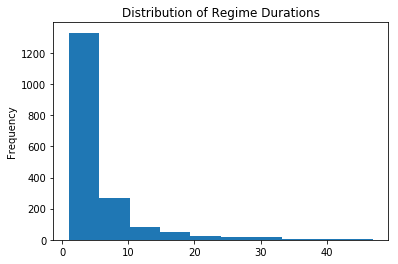

In [20]:
df['duration'].plot.hist(title="Distribution of Regime Durations")

Most regimes have lasted between 0-5 years.

In [8]:
from lifelines import KaplanMeierFitter

In [9]:
kmf = KaplanMeierFitter()

In [10]:
T = df['duration']
C = df['observed']

In [11]:
kmf.fit(T,C)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

The Kaplan Meier Fitter is utilized to estimate our surival curve. A regime is defined as censored when the regime's head of state dies in power or if the regime is currently in power.

### Regime Survival

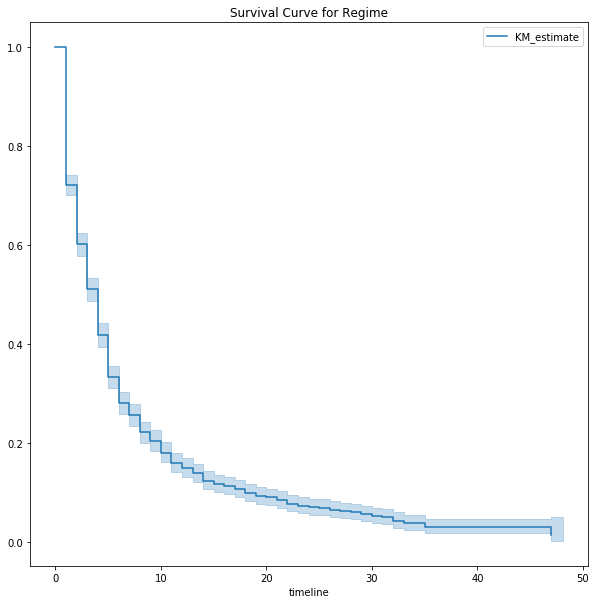

In [12]:
%matplotlib inline
kmf.plot(figsize=(10,10), title="Survival Curve for Regime")

"Empires inevitably fall, and when they do, history judges them for the legacies they leave behind." - Noah Feldman

### Regime Survival by Type of Government

/home/kishan/anaconda3/envs/deeplearn3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


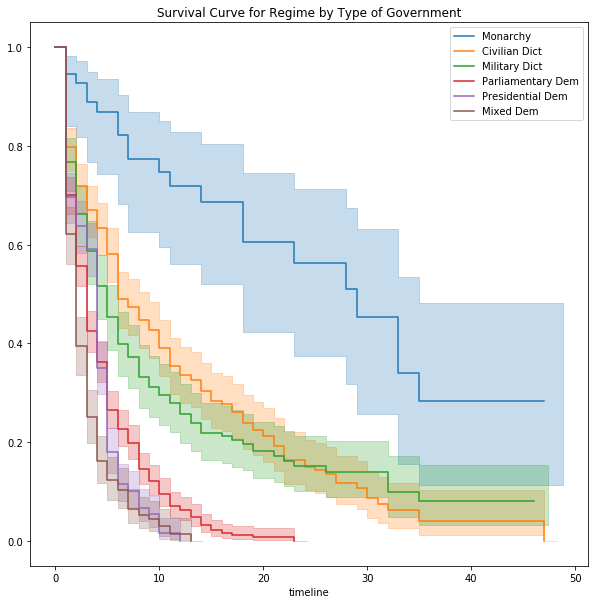

In [13]:
from matplotlib.pyplot import subplot 
ax = subplot(111)

for reg in df['regime'].unique():
    ix = df['regime'] == reg
    kmf.fit(T.ix[ix], C.ix[ix], label=reg)
    ax = kmf.plot(ax=ax, figsize=(10,10), title="Survival Curve for Regime by Type of Government")

### Regime Survival by Continent

/home/kishan/anaconda3/envs/deeplearn3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


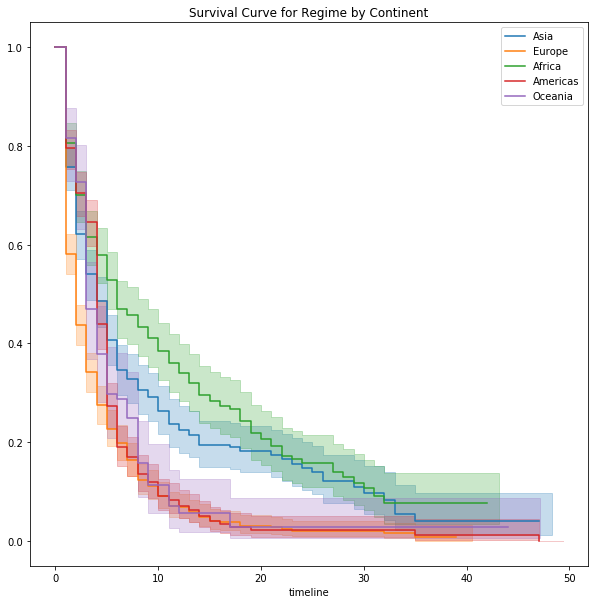

In [14]:
from matplotlib.pyplot import subplot 
ax = subplot(111)

for reg in df['un_continent_name'].unique():
    ix = df['un_continent_name'] == reg
    kmf.fit(T.ix[ix], C.ix[ix], label=reg)
    ax = kmf.plot(ax=ax, figsize=(10,10), title="Survival Curve for Regime by Continent")

In [15]:
q_africa = """
SELECT
  COUNT(*) as freq,
  regime
FROM df
WHERE
    un_continent_name = 'Africa'
GROUP BY
    regime
ORDER BY
    freq DESC
"""

In [16]:
print (sqldf(q_africa, locals()))


   freq             regime
0   114      Civilian Dict
1    89      Military Dict
2    58          Mixed Dem
3    24   Presidential Dem
4    18  Parliamentary Dem
5    11           Monarchy


In [17]:
q_europe = """
SELECT
  COUNT(*) as freq,
  regime
FROM df
WHERE
    un_continent_name = 'Europe'
GROUP BY
    regime
ORDER BY
    freq DESC
"""

In [18]:
print (sqldf(q_europe, locals()))

   freq             regime
0   260  Parliamentary Dem
1   178          Mixed Dem
2    69      Civilian Dict
3    63   Presidential Dem
4     6      Military Dict


Africa has historically had a higher probability of regime surivival over time in comparison to Europe. The SQL queries show that Africa has predominantly had military dictorships while Europe has had more democratic regimes.

### Regime Survival Democratic vs. Non-democratic

/home/kishan/anaconda3/envs/deeplearn3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


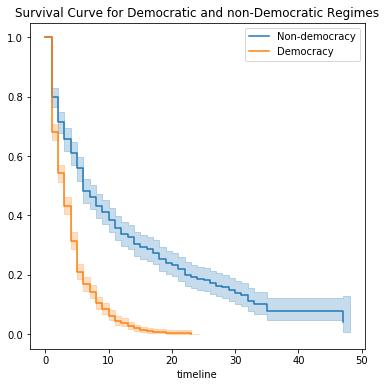

In [19]:
from matplotlib.pyplot import subplot 
ax = subplot(111)

for reg in df['democracy'].unique():
    ix = df['democracy'] == reg
    kmf.fit(T.ix[ix], C.ix[ix], label=reg)
    ax = kmf.plot(ax=ax, figsize=(6,6), title="Survival Curve for Democratic and non-Democratic Regimes")

Non-democratic regimes have much higher surival rates over time in comparison to democratic regimes.